In [267]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [268]:
train=pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Data

In [269]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

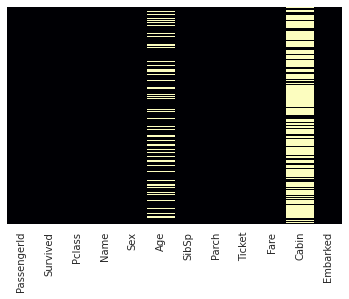

In [270]:
#ytics total =891, we are setting its value to FALSE, because we don't want labels showing up on the left, if you want labels change false to true.

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='magma')
#colored values are null values.
#cabin is having more null values.
# cmaps['Perceptually Uniform Sequential'] = [
#             'viridis', 'plasma', 'inferno', 'magma', 'cividis']

# cmaps['Sequential'] = [
#             'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']


<AxesSubplot:xlabel='Survived', ylabel='count'>

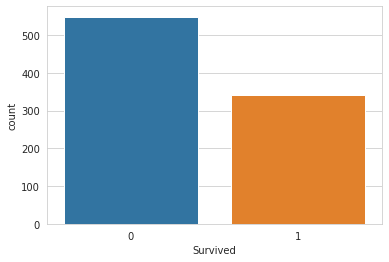

In [271]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

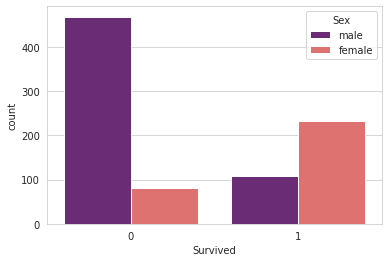

In [272]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue='Sex',data=train,palette="magma")

<AxesSubplot:xlabel='Survived', ylabel='count'>

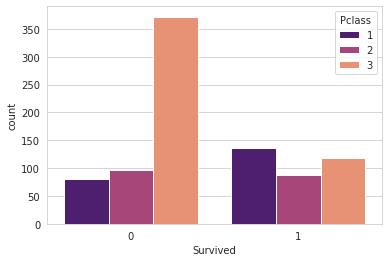

In [273]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=train,palette="magma")

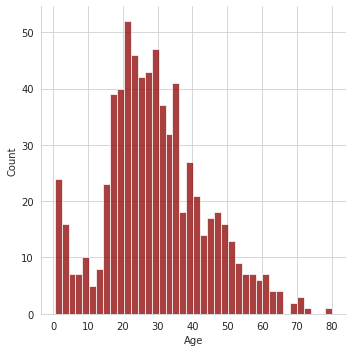

In [274]:
sns.displot(x=train['Age'].dropna(),color="darkred",kde=False,bins=40)
#distplot for histogram.
#Normal distribution and it forms a bell curve

<AxesSubplot:xlabel='SibSp', ylabel='count'>

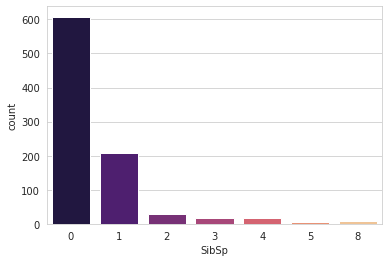

In [275]:
sns.countplot(x="SibSp",data=train,palette="magma")

<AxesSubplot:>

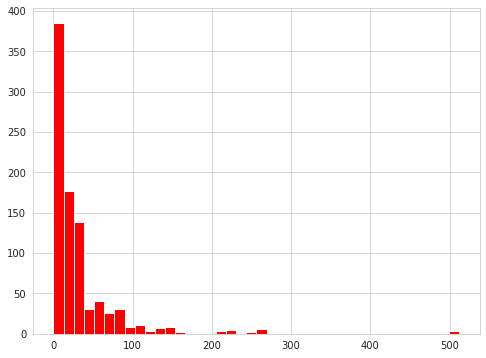

In [276]:
train['Fare'].hist(color="red",bins=40,figsize=(8,6))
#matplotlib

# Removing Null Values

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

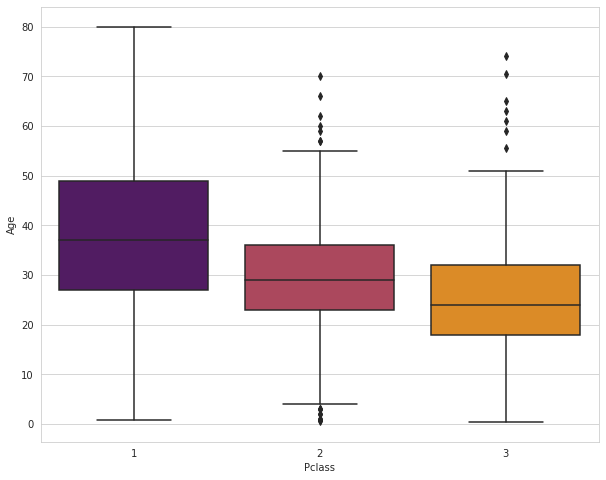

In [277]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass",y='Age',data=train,palette="inferno")
#Boxplot gives the average and where most of the age lies in the data.

In [278]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        if Pclass==2:
            return 29
        if Pclass==3:
            return 24
    else:
        return Age

In [279]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
# apply is used to apply the function to the data
# here we are passing two columns as a single parameter
# and then trying to return the values.

train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

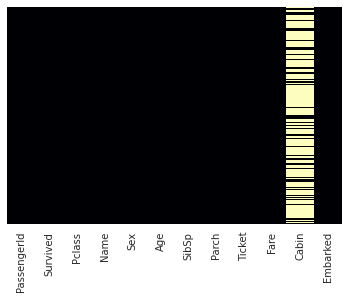

In [280]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="magma")
#all the null values in the age are replaced by the values that we have set.

In [281]:
train.drop('Cabin',axis=1,inplace=True)
train.head()
#cabin value is dropped because there are more null values and they are to be handled by
#by more amount of feature engineering.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [282]:
train['Embarked'].nunique()

3

In [283]:
pd.get_dummies(train['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [284]:
train['Sex'].nunique()

2

In [285]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [286]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [287]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [288]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [296]:

train=pd.concat([train,sex,embarked],axis=1)

train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [297]:

survived=train['Survived']
j=train.drop('Survived',axis=1)


In [300]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(j,survived,random_state=77,test_size=0.2)

In [301]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/home/akash/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [302]:
pred=logmodel.predict(X_test)

In [303]:
from sklearn.metrics import confusion_matrix

In [304]:
accu=confusion_matrix(y_test,pred)

In [305]:
accu

array([[145,  17],
       [ 41,  65]])

In [307]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,pred)
accu

0.7835820895522388